In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import bar_chart_race as bcr

import warnings
warnings.filterwarnings("ignore")

Let's first set the league ID

In [11]:
# Example usage
league_id = '780695' ## CHANGE ME to your league's ID 

# Plot the current standings

In [12]:
def plot_current_standings(league_id, save_dir=f'league_{league_id}/output/current_standings.png'):
    f = open(f'league_{league_id}/league_data/league_{league_id}_data.json')
    
    # returns JSON object as a dictionary
    data = json.load(f)

    # Extract results
    standings_df = pd.DataFrame(data['standings']['results'])

    # Set the bottom limit (min # points)
    x_limit = standings_df['total'].min() - (.05 * standings_df['total'].min() )

    # Plotting the total points of the league standings
    plt.figure(figsize=(6, 4))
    plt.barh(standings_df['player_name'][::-1], standings_df['total'][::-1], color='skyblue')
    plt.xlabel('Total Points')
    plt.ylabel('Player Name')
    plt.xlim(left=x_limit)
    plt.title(f'Current League Standings')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    if save_dir:
        plt.savefig(save_dir)
    plt.show()

This will use the data gathered from the ```get_league_and_user_data.ipynb``` notebook. 

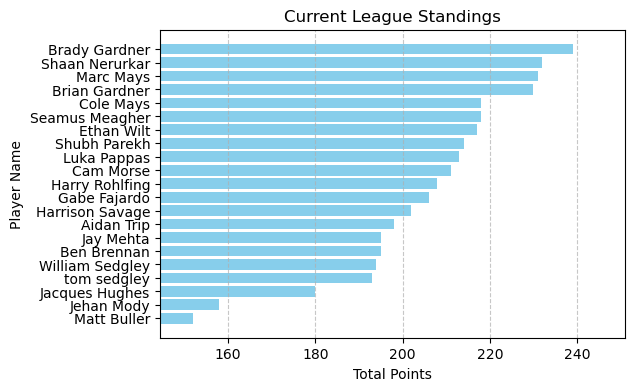

In [13]:
plot_current_standings(league_id)

# GW History Lineplot

In [14]:
def lineplot_gw_history(gw_history_df, save_dir=f'league_{league_id}/output/gw_history_lineplot.png'):
    plt.figure(figsize=(12, 10))
    for col in gw_history_df.columns:
        if col != 'GW':
            plt.plot(gw_history_df['GW'].values, gw_history_df[col].values, label=col, marker='o')
    plt.title('Gameweek Points by Player')
    plt.xlabel('Gameweek')
    plt.ylabel('Points')
    plt.xticks(rotation=45)
    plt.legend(title='Player Name')
    plt.grid(True)
    plt.tight_layout()
    if save_dir:
        plt.savefig(save_dir)
    plt.show()

This function uses the gw_history_df from the ```get_league_and_user_data.ipynb``` notebook. 

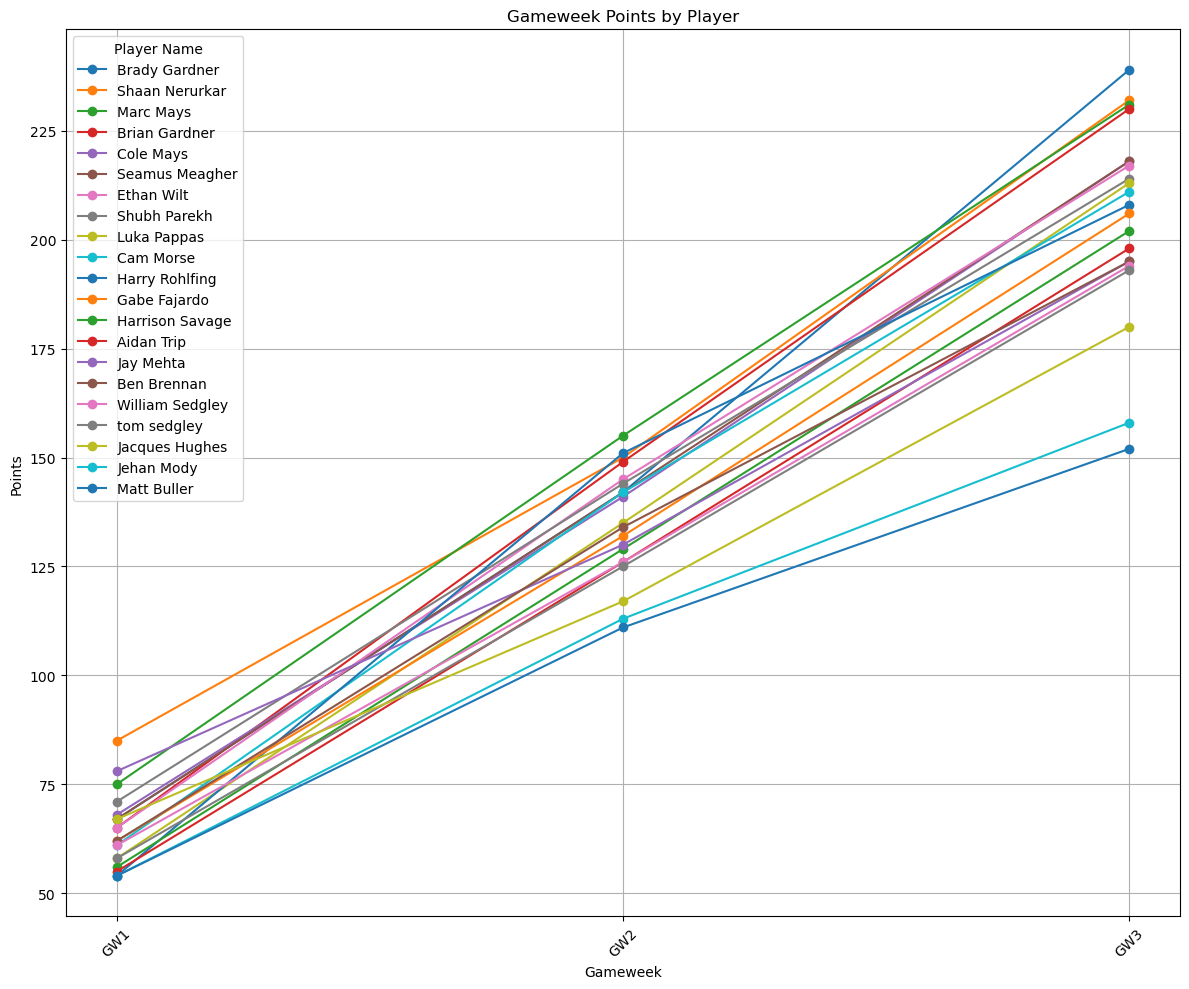

In [15]:
gw_history_df = pd.read_csv(f'league_{league_id}/league_data/league_{league_id}_gw_history_df.csv')
lineplot_gw_history(gw_history_df)

# GW History Bar Chart Race

In [16]:
def bar_chart_race_gw_history(gw_history_df, show_top_N=8, speed=700, save_dir=f'league_{league_id}/output/league_{league_id}_bar_chart_race.mp4'):

    """
    Generates and saves a bar chart race visualization of gameweek history.

    Parameters:
    gw_history_df (DataFrame): DataFrame containing the gameweek history data.
    show_top_N (int, optional): Number of top bars to display in the chart race. Default is 8.
    speed (int, optional): Speed of the bar chart race animation. Default is 700 milliseconds.
    save_dir (str, optional): Directory path where the bar chart race video will be saved. Default is 'league_{league_id}/league_{league_id}_bar_chart_race.mp4'.

    Returns:
    None
    """
        
    dynamic_df = gw_history_df.set_index('GW')
    bcr.bar_chart_race(
        df=dynamic_df,
        filename=save_dir,
        period_length=speed,
        fixed_order=False,
        fixed_max=True,
        label_bars=True,
        orientation = 'h',
        sort='desc',
        n_bars=show_top_N,
        title="FPL league standings"
    )
    print(f"Bar chart race saved successfully to {save_dir}")


In [17]:
bar_chart_race_gw_history(gw_history_df)

Bar chart race saved successfully to league_780695/output/league_780695_bar_chart_race.mp4


In [18]:
from IPython.display import Video
Video(f'league_{league_id}/output/league_{league_id}_bar_chart_race.mp4')